## IMPORTING THE LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize,word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn. linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vaish_s4kcn30\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Importing the dataset

In [5]:
df = pd.read_csv(r"C:\Users\vaish_s4kcn30\Downloads\Python\My portfolio\e-commerce product categorization using NLP\Dataset\train_product_data.csv")
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",..."


### Filtering the dataframe by choosing only the required columns:

In [7]:
df = df[['description','product_category_tree']]

In [8]:
df.sample()

,description,product_category_tree
3165,Printland PMR1303 Ceramic Mug (350 g)\n ...,Kitchen & Dining


### Renaming the column headers for easy of understanding:

In [10]:
df.columns = ['Description', 'Product Category']
df.head()

,Description,Product Category
0,Key Features of Alisha Solid Women's Cycling S...,Clothing
1,Key Features of AW Bellies Sandals Wedges Heel...,Footwear
2,Key Features of Alisha Solid Women's Cycling S...,Clothing
3,Key Features of Alisha Solid Women's Cycling S...,Clothing
4,"Key Features of dilli bazaaar Bellies, Corpora...",Footwear


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Description       14998 non-null  object
 1   Product Category  14999 non-null  object
dtypes: object(2)
memory usage: 234.5+ KB


In [12]:
df.shape

(14999, 2)

### Checking for duplicates: 

In [14]:
df.duplicated().sum()

1832

In [15]:
df = df.drop_duplicates(keep='first')
df.shape

(13167, 2)

### Checking for null values:

In [17]:
df.isnull().sum()

Description         1
Product Category    0
dtype: int64

In [18]:
df = df.dropna()

In [19]:
df.shape

(13166, 2)

## EXPLORATORY DATA ANALYSIS:

In [21]:
df['Product Category'].unique()

array(['Clothing ', 'Footwear ', 'Pens & Stationery ',
       'Bags, Wallets & Belts ', 'Home Decor & Festive Needs ',
       'Automotive ', 'Tools & Hardware ', 'Baby Care ',
       'Mobiles & Accessories ', 'Watches ', 'Toys & School Supplies ',
       'Jewellery ', 'Kitchen & Dining ', 'Computers '], dtype=object)

In [22]:
df['Product Category'].nunique()

14

### Checking the distribution of the product category by count:

In [24]:
prod_df = df['Product Category'].value_counts().reset_index()

In [25]:
prod_df

,Product Category,count
0,Clothing,4663
1,Jewellery,2658
2,Footwear,988
3,Automotive,935
4,Home Decor & Festive Needs,606
5,Kitchen & Dining,606
6,Computers,529
7,Watches,526
8,Mobiles & Accessories,501
9,Tools & Hardware,321


### Visualization of product category distribution:

plt.figure(figsize=(15,10))
sns.barplot(data = prod_df, x='Product Category', y = 'count')
plt.title('Bar plot for the distribution of the product category', fontsize = 20)
plt.xticks(rotation = 90)
for index, value in enumerate(prod_df['count']):
    plt.text(index,value+50,np.round(prod_df['count'].iloc[index],2),rotation = 90)
plt.ylim(0,5000)
plt.show()

### Let's create a function to count the total number of words:

In [29]:
def word_count(text):
    return len(text.split())

In [30]:
df['Word Count']= df['Description'].apply(lambda x: word_count(x))

In [31]:
df.head()

,Description,Product Category,Word Count
0,Key Features of Alisha Solid Women's Cycling S...,Clothing,64
1,Key Features of AW Bellies Sandals Wedges Heel...,Footwear,107
2,Key Features of Alisha Solid Women's Cycling S...,Clothing,63
3,Key Features of Alisha Solid Women's Cycling S...,Clothing,65
4,"Key Features of dilli bazaaar Bellies, Corpora...",Footwear,64


In [32]:
total_word_count = df['Word Count'].sum()
print(f"Total number of words in the description column is {total_word_count}")

Total number of words in the description column is 864533


In [33]:
avg_word_count = df['Word Count'].mean()
print(f"The average number of words in the description column is {avg_word_count}")

The average number of words in the description column is 65.66405893969315


In [34]:
df.describe()

,Word Count
count,13166.000000
mean,65.664059
std,65.778672
min,8.000000
25%,32.000000
50%,37.000000
75%,72.000000
max,872.000000


In [35]:
df[df['Word Count']==872]

,Description,Product Category,Word Count
357,Asian Gems & Jewels 6.25 Ratti 5 Dhaatu Sterli...,Jewellery,872


In [36]:
df[df['Word Count']==872].iloc[0,0]

"Asian Gems & Jewels 6.25 Ratti 5 Dhaatu Sterling Silver, Metal, Alloy Cat's Eye NA K Ring\n                         Price: Rs. 828\n\t\t\t\t\n\t\t\tAsian Gem & Jewellery offers you Panch dhaatu Cultured Gemstone Finger Ring . 'ASIAN GEMS & JEWELS' and all its grading standards and content (Copyright Registered)\n belongs to the Owners of NEW INDIA WORKS (NIW).\nIn Hindi, '9' means 'Nav' and '5' means 'Punch'. Gem is called 'Ratna', whereas any 'Metal or Mineral or Element' is referred as 'Dhaatu'.\nRegarding 9 Gemstones. 'Nav Ratnas' means an 'Astro Planetary' communicating team of 9 Precious and Semi Precious Gemstones those are believed to reach and connect out to 9 Planets residing, revolving in our galaxy. \nIn the Birth Horoscope of an individual, if any planet is weak or some other planets are not sitting in the right degree/position or house or are opposing or suppressing some other planets than :-\nRUBY (MANIK) is considered to connect, enhance and empower Planet Sun (Surya) .

### Visualisation of the distribution of word count in a histogram:

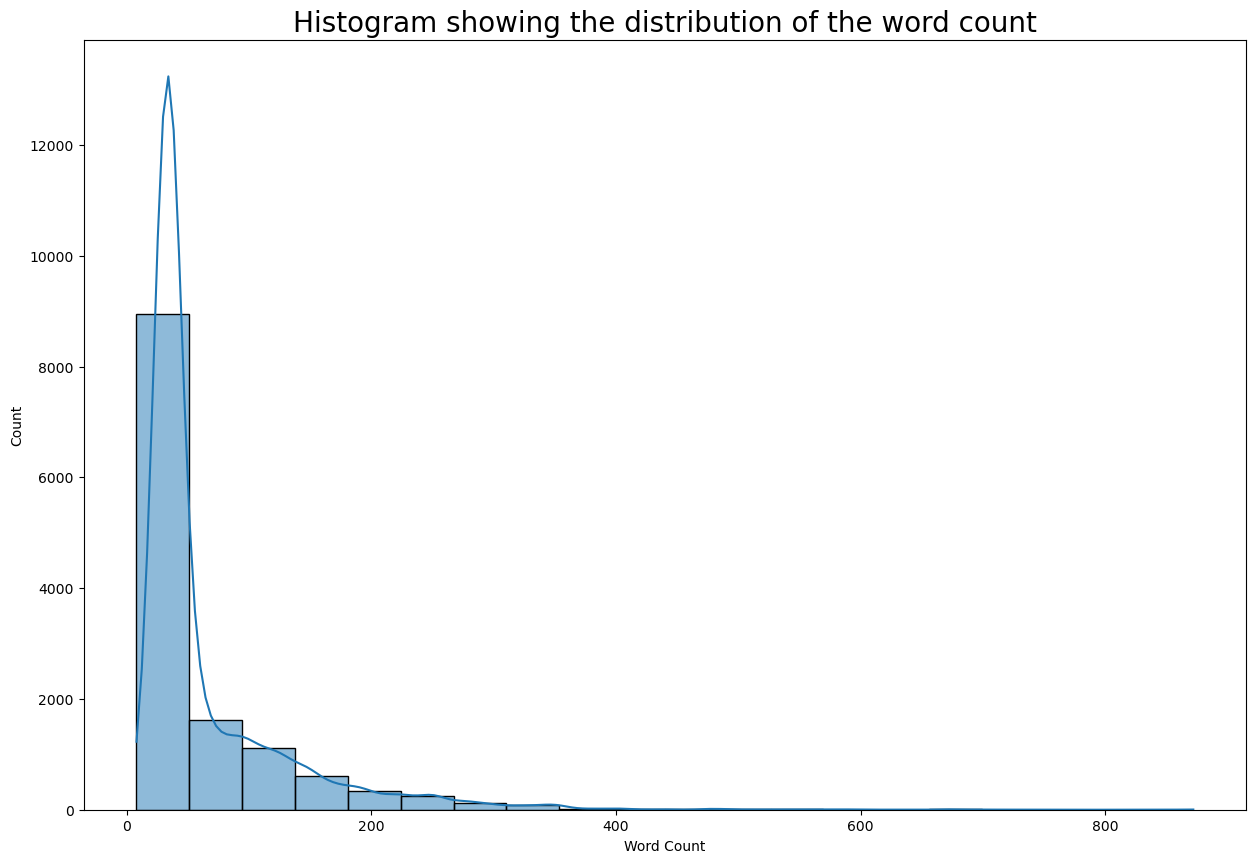

In [38]:
plt.figure(figsize=(15,10))
sns.histplot(data = df, x= 'Word Count', bins = 20, kde = True)
plt.title('Histogram showing the distribution of the word count', fontsize = 20)
plt.show()

### Visualisation of the distribution of word count in a box plot:

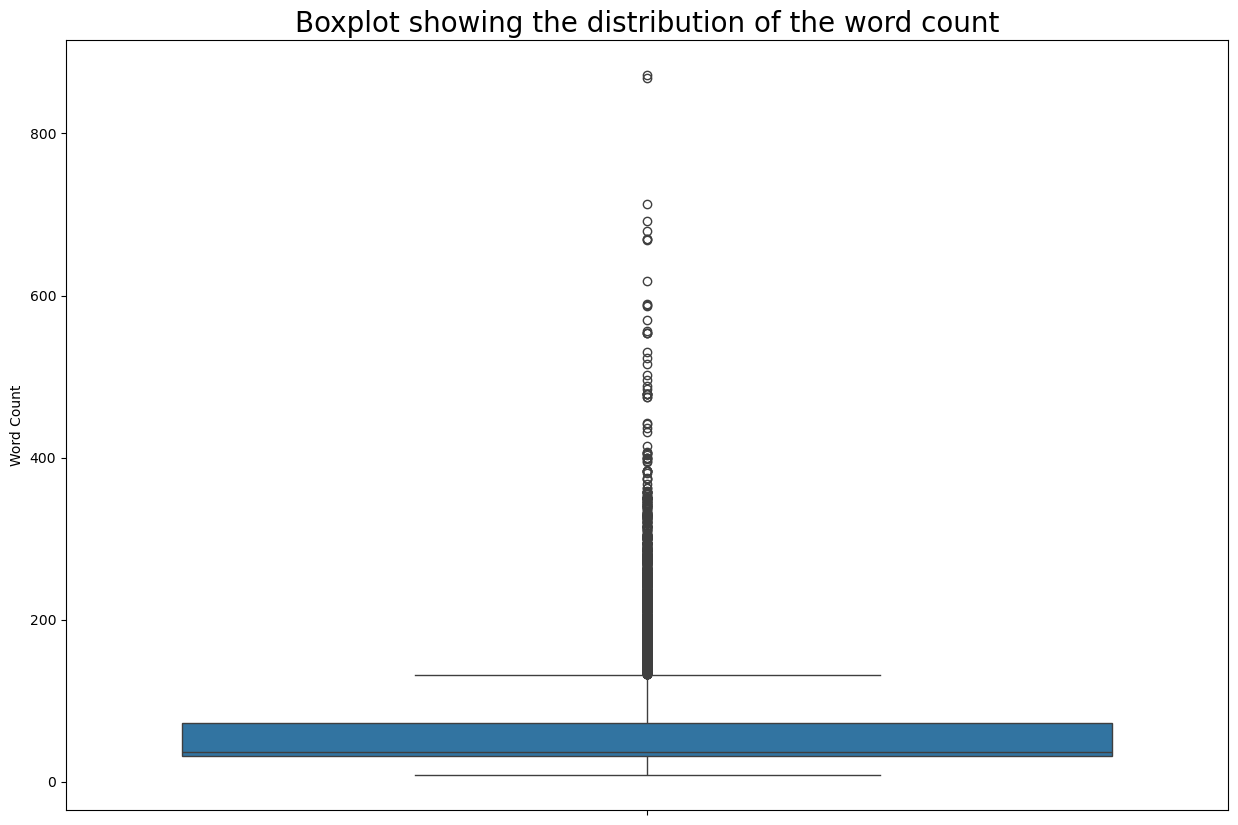

In [40]:
plt.figure(figsize=(15,10))
sns.boxplot(data = df, y= 'Word Count')
plt.title('Boxplot showing the distribution of the word count', fontsize = 20)
plt.show()

### Top 5 descriptions with the maximum word count:

In [42]:
df.sort_values(['Word Count'], ascending=False).head().reset_index()

,index,Description,Product Category,Word Count
0,357,Asian Gems & Jewels 6.25 Ratti 5 Dhaatu Sterli...,Jewellery,872
1,375,Asian Gems & Jewels 5.25 Ratti 5 Dhaatu Sterli...,Jewellery,869
2,13123,"R18Jewels-Fashion&U Peacock Princess Metal, En...",Jewellery,713
3,8045,Fastrack 9912PP15 Tees Analog Watch - For Men...,Watches,692
4,13129,R18Jewels-Fashion&U Princess Fashionista Metal...,Jewellery,680


### Top 5 descriptions with the minimum word count:

In [44]:
df.sort_values(['Word Count'], ascending=True).head()

,Description,Product Category,Word Count
9703,Klick Women's Leggings\n ...,Clothing,8
107,La Briza Mile Boots\n ...,Footwear,9
14750,Kristino Men's Solid Formal Shirt\n ...,Clothing,10
14751,Kristino Men's Solid Formal Shirt\n ...,Clothing,10
14943,BGS Alloy Bracelet\n P...,Jewellery,10


### Let's create a function to count the total number of characters:


In [46]:
def char_len_count(text):
    return len(text)

In [47]:
df['Character Length'] = df['Description'].apply(lambda x:char_len_count(x))
df.head()

,Description,Product Category,Word Count,Character Length
0,Key Features of Alisha Solid Women's Cycling S...,Clothing,64,410
1,Key Features of AW Bellies Sandals Wedges Heel...,Footwear,107,650
2,Key Features of Alisha Solid Women's Cycling S...,Clothing,63,403
3,Key Features of Alisha Solid Women's Cycling S...,Clothing,65,416
4,"Key Features of dilli bazaaar Bellies, Corpora...",Footwear,64,428


In [48]:
total_char_length = df['Character Length'].sum()
print(f"The total character length is {total_char_length}")

The total character length is 5408132


In [49]:
avg_char_length = df['Character Length'].mean()
print(f"The average character length is {avg_char_length}")

The average character length is 410.76500075953214


In [50]:
df['Character Length'].describe()

count    13166.000000
mean       410.765001
std        402.331821
min         74.000000
25%        200.000000
50%        227.000000
75%        459.750000
max       5309.000000
Name: Character Length, dtype: float64

### Visualisation of the distribution of character count in a histogram:

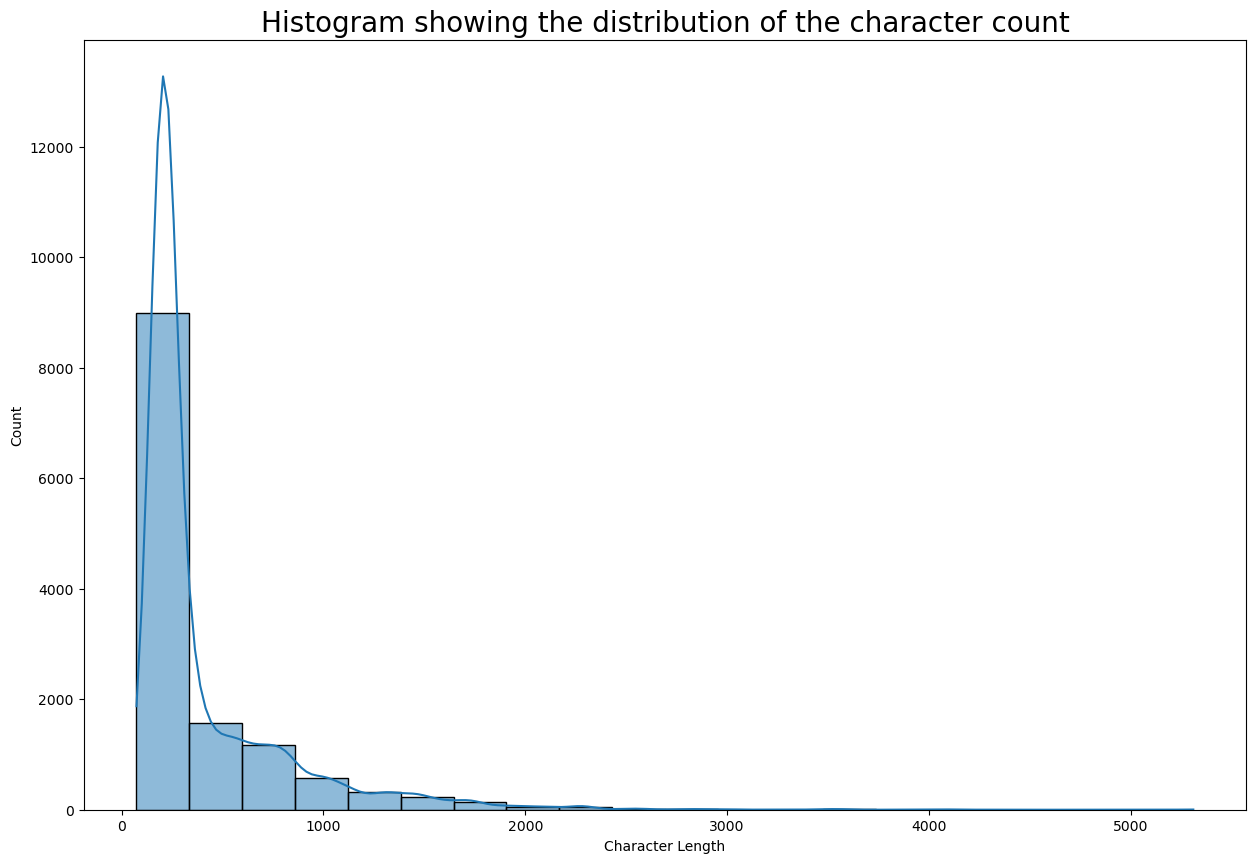

In [52]:
plt.figure(figsize=(15,10))
sns.histplot(data = df, x='Character Length', bins = 20, kde = True)
plt.title('Histogram showing the distribution of the character count', fontsize = 20)
plt.show()

In [53]:
df_prod_count = df.groupby(['Product Category'])[['Word Count','Character Length']].mean().sort_values(['Word Count','Character Length'], ascending = False).reset_index()

In [54]:
df_prod_count

,Product Category,Word Count,Character Length
0,Mobiles & Accessories,119.099800,742.247505
1,Kitchen & Dining,100.716172,600.231023
2,Home Decor & Festive Needs,98.259076,606.024752
3,Computers,87.103970,552.837429
4,"Bags, Wallets & Belts",84.756579,537.407895
5,Automotive,80.649198,485.563636
6,Baby Care,70.153846,435.779487
7,Pens & Stationery,59.517857,379.107143
8,Clothing,59.384087,370.345700
9,Tools & Hardware,55.647975,358.165109


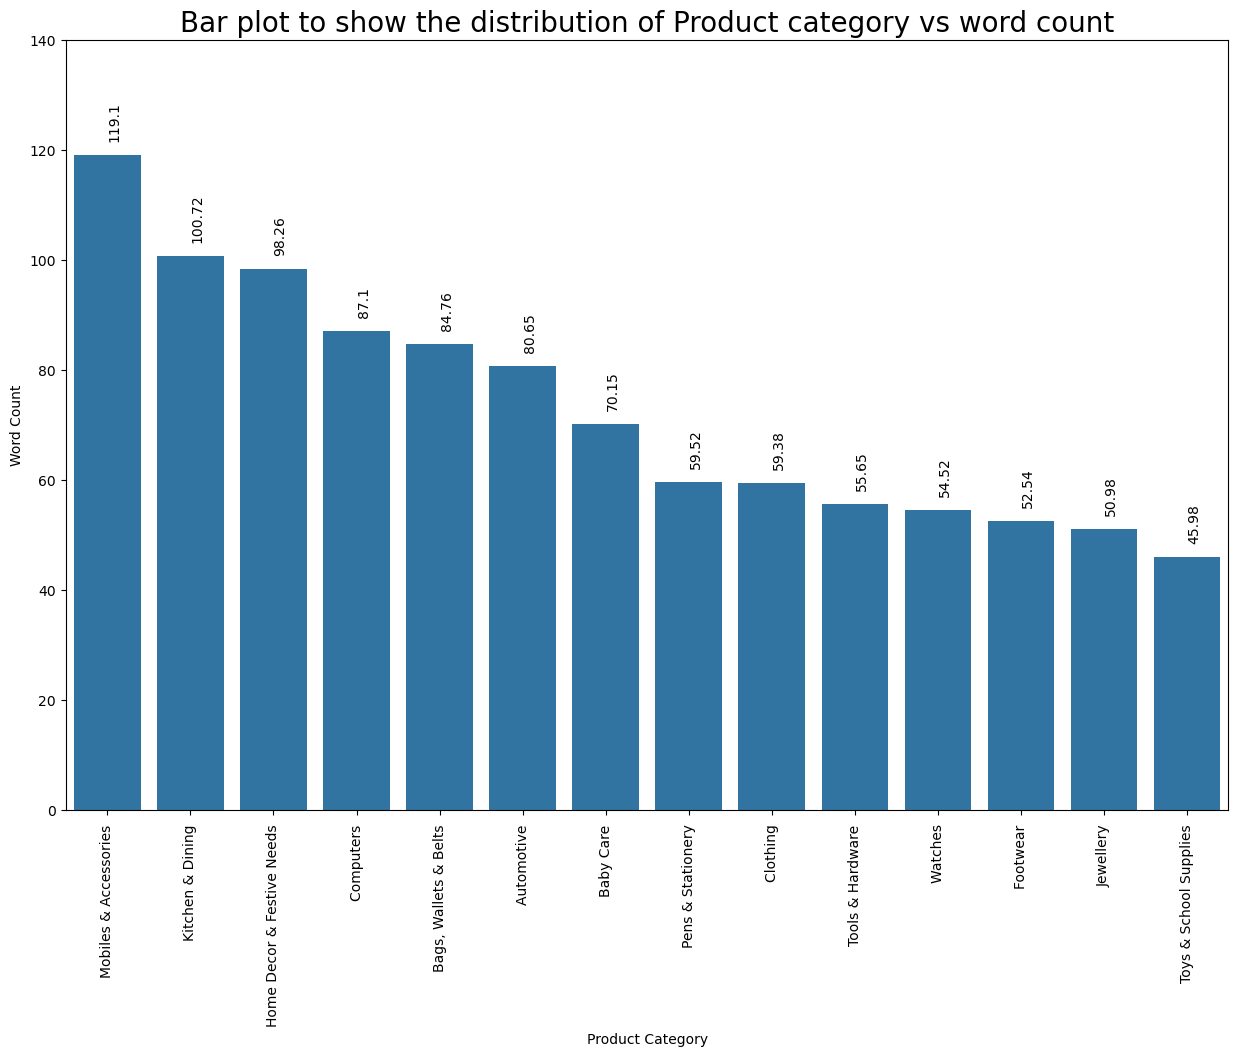

In [55]:
plt.figure(figsize = (15,10))
sns.barplot(data = df_prod_count, x='Product Category',y='Word Count')
for index, value in enumerate(df_prod_count['Word Count']):
    plt.text(index,value+3,np.round(df_prod_count['Word Count'].iloc[index],2),rotation = 90)
plt.title('Bar plot to show the distribution of Product category vs word count', fontsize = 20)
plt.ylim(0,140)
plt.xticks(rotation = 90)
plt.show()

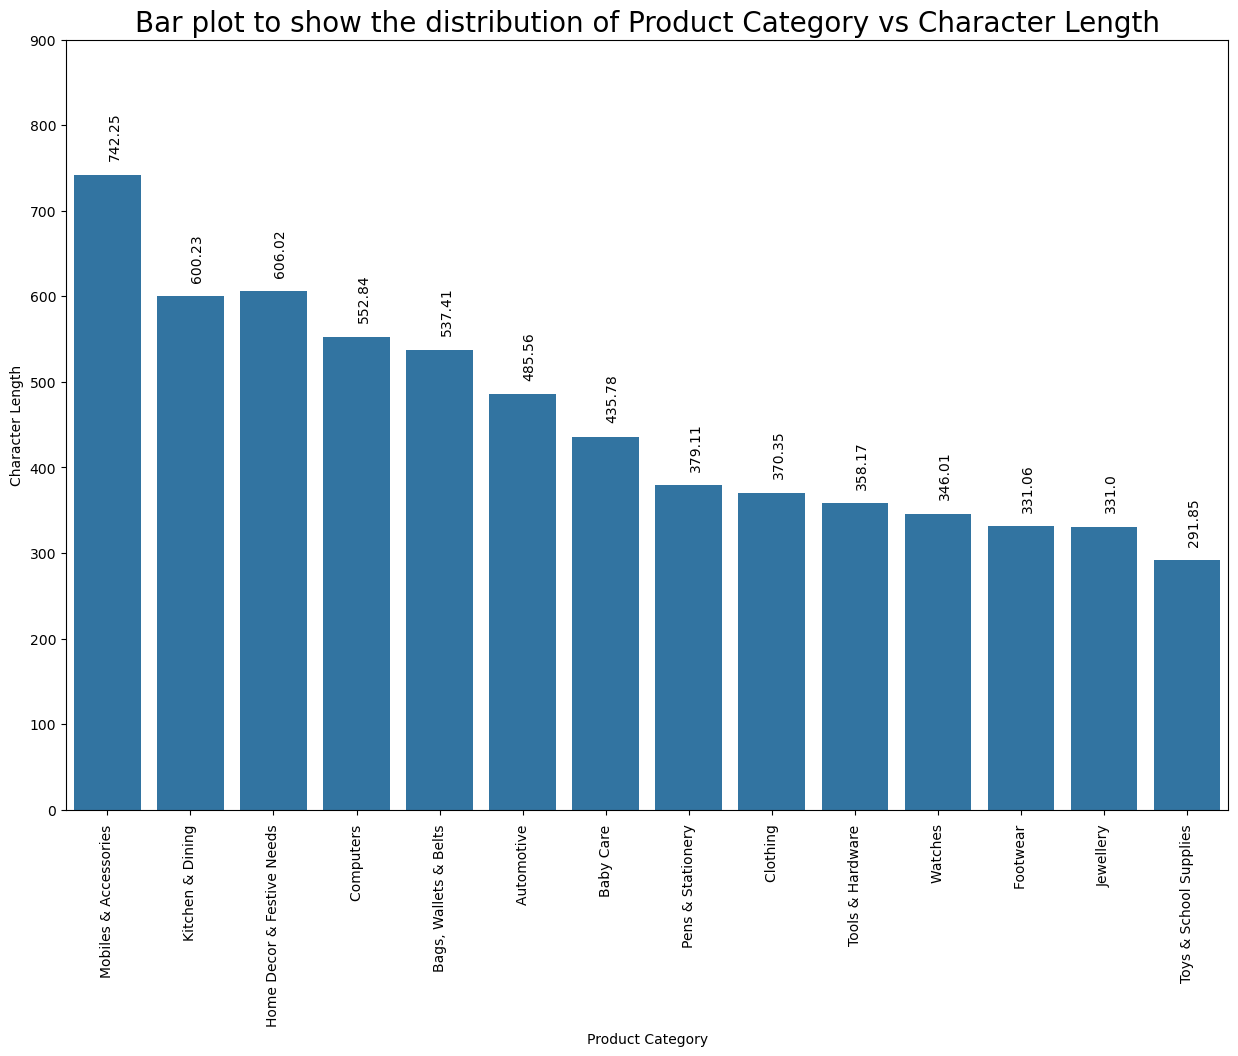

In [56]:
plt.figure(figsize = (15,10))
sns.barplot(data = df_prod_count, x='Product Category',y='Character Length')
for index, value in enumerate(df_prod_count['Character Length']):
    plt.text(index,value+20,np.round(df_prod_count['Character Length'].iloc[index],2),rotation = 90)
plt.title('Bar plot to show the distribution of Product Category vs Character Length', fontsize = 20)
plt.ylim(0,900)
plt.xticks(rotation = 90)
plt.show()

## Text Pre-Processing:

In [58]:
df.head()

,Description,Product Category,Word Count,Character Length
0,Key Features of Alisha Solid Women's Cycling S...,Clothing,64,410
1,Key Features of AW Bellies Sandals Wedges Heel...,Footwear,107,650
2,Key Features of Alisha Solid Women's Cycling S...,Clothing,63,403
3,Key Features of Alisha Solid Women's Cycling S...,Clothing,65,416
4,"Key Features of dilli bazaaar Bellies, Corpora...",Footwear,64,428


### Text cleaning

### Removing the stop words:

In [61]:
sw = stopwords.words('english')

### We will define multiple functions to clean the description:

In [63]:
def remove_stopwords(text):
    word_list = [w for w in text.split() if w not in sw]
    return " ".join(word_list)

In [64]:
def lower_case(text):
    return text.lower()

In [65]:
def remove_numbers(text):
    removed_word_list = re.sub(r'\d+',' ',text)
    return removed_word_list

In [66]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [67]:
def remove_punct(text):
    for chr in text:
        if chr in string.punctuation:
            text = text.replace(chr," ")
    return text  

In [68]:
def remove_space(text):
    return " ".join(text.split())

### We will define a final function to give the result of the completely cleaned text by using all the previous functions we had created earlier:

In [70]:
def cleaned_description (text):
    text = lower_case(text)
    text = remove_stopwords(text)
    text = remove_punct(text)
    text = remove_numbers(text)
    text = remove_space(text)
    return text

In [71]:
df.sample()

,Description,Product Category,Word Count,Character Length
8691,"Royal Diamond Jewellery Charisma Gold, Yellow ...",Jewellery,178,1092


In [72]:
sample_text = df['Description'][0]


In [73]:
sample_text

"Key Features of Alisha Solid Women's Cycling Shorts Cotton Lycra Navy, Red, Navy,Specifications of Alisha Solid Women's Cycling Shorts Shorts Details Number of Contents in Sales Package Pack of 3 Fabric Cotton Lycra Type Cycling Shorts General Details Pattern Solid Ideal For Women's Fabric Care Gentle Machine Wash in Lukewarm Water, Do Not Bleach Additional Details Style Code ALTHT_3P_21 In the Box 3 shorts"

In [74]:
len(sample_text)

410

In [75]:
cleaned_text = cleaned_description(sample_text)
cleaned_text

'key features alisha solid women s cycling shorts cotton lycra navy red navy specifications alisha solid women s cycling shorts shorts details number contents sales package pack fabric cotton lycra type cycling shorts general details pattern solid ideal women s fabric care gentle machine wash lukewarm water bleach additional details style code altht p box shorts'

In [76]:
len(cleaned_text)

363

In [77]:
df['Cleaned Description'] = df['Description'].apply(lambda x:cleaned_description(x))
df.head()

,Description,Product Category,Word Count,Character Length,Cleaned Description
0,Key Features of Alisha Solid Women's Cycling S...,Clothing,64,410,key features alisha solid women s cycling shor...
1,Key Features of AW Bellies Sandals Wedges Heel...,Footwear,107,650,key features aw bellies sandals wedges heel ca...
2,Key Features of Alisha Solid Women's Cycling S...,Clothing,63,403,key features alisha solid women s cycling shor...
3,Key Features of Alisha Solid Women's Cycling S...,Clothing,65,416,key features alisha solid women s cycling shor...
4,"Key Features of dilli bazaaar Bellies, Corpora...",Footwear,64,428,key features dilli bazaaar bellies corporate c...


In [78]:
def Cleaned_word_count(text):
    text = len(text.split())
    return text

In [79]:
def Cleaned_character_count(text):
    text = len(text)
    return text

In [80]:
df['Cleaned Word Count'] = df['Cleaned Description'].apply(lambda x:Cleaned_word_count(x))
df.head()


,Description,Product Category,Word Count,Character Length,Cleaned Description,Cleaned Word Count
0,Key Features of Alisha Solid Women's Cycling S...,Clothing,64,410,key features alisha solid women s cycling shor...,56
1,Key Features of AW Bellies Sandals Wedges Heel...,Footwear,107,650,key features aw bellies sandals wedges heel ca...,81
2,Key Features of Alisha Solid Women's Cycling S...,Clothing,63,403,key features alisha solid women s cycling shor...,54
3,Key Features of Alisha Solid Women's Cycling S...,Clothing,65,416,key features alisha solid women s cycling shor...,57
4,"Key Features of dilli bazaaar Bellies, Corpora...",Footwear,64,428,key features dilli bazaaar bellies corporate c...,55


In [81]:
df['Cleaned Character Count'] = df['Cleaned Description'].apply(lambda x:Cleaned_character_count(x))
df.head()

,Description,Product Category,Word Count,Character Length,Cleaned Description,Cleaned Word Count,Cleaned Character Count
0,Key Features of Alisha Solid Women's Cycling S...,Clothing,64,410,key features alisha solid women s cycling shor...,56,363
1,Key Features of AW Bellies Sandals Wedges Heel...,Footwear,107,650,key features aw bellies sandals wedges heel ca...,81,538
2,Key Features of Alisha Solid Women's Cycling S...,Clothing,63,403,key features alisha solid women s cycling shor...,54,358
3,Key Features of Alisha Solid Women's Cycling S...,Clothing,65,416,key features alisha solid women s cycling shor...,57,369
4,"Key Features of dilli bazaaar Bellies, Corpora...",Footwear,64,428,key features dilli bazaaar bellies corporate c...,55,381


In [82]:
df = df[['Product Category','Description','Cleaned Description','Word Count',
        'Cleaned Word Count','Character Length','Cleaned Character Count']]
df.head()

,Product Category,Description,Cleaned Description,Word Count,Cleaned Word Count,Character Length,Cleaned Character Count
0,Clothing,Key Features of Alisha Solid Women's Cycling S...,key features alisha solid women s cycling shor...,64,56,410,363
1,Footwear,Key Features of AW Bellies Sandals Wedges Heel...,key features aw bellies sandals wedges heel ca...,107,81,650,538
2,Clothing,Key Features of Alisha Solid Women's Cycling S...,key features alisha solid women s cycling shor...,63,54,403,358
3,Clothing,Key Features of Alisha Solid Women's Cycling S...,key features alisha solid women s cycling shor...,65,57,416,369
4,Footwear,"Key Features of dilli bazaaar Bellies, Corpora...",key features dilli bazaaar bellies corporate c...,64,55,428,381


In [83]:
final_df = df[['Product Category','Cleaned Description']]
final_df.head()

,Product Category,Cleaned Description
0,Clothing,key features alisha solid women s cycling shor...
1,Footwear,key features aw bellies sandals wedges heel ca...
2,Clothing,key features alisha solid women s cycling shor...
3,Clothing,key features alisha solid women s cycling shor...
4,Footwear,key features dilli bazaaar bellies corporate c...


In [84]:
final_df.dtypes

Product Category       object
Cleaned Description    object
dtype: object

In [85]:
final_df['Product Category']= [str(i)[:-1] for i in final_df['Product Category'] ] # We are using this in order to remove the empty spacing at the end of the string

### We will now transform the product category into a numerical format so that it can be fitted into our ML model:

In [87]:
le = LabelEncoder()
final_df['Product Category Encoded'] = le.fit_transform(final_df['Product Category'])

In [88]:
le.classes_

array(['Automotive', 'Baby Care', 'Bags, Wallets & Belts', 'Clothing',
       'Computers', 'Footwear', 'Home Decor & Festive Needs', 'Jewellery',
       'Kitchen & Dining', 'Mobiles & Accessories', 'Pens & Stationery',
       'Tools & Hardware', 'Toys & School Supplies', 'Watches'],
      dtype=object)

In [89]:
final_df.head()

,Product Category,Cleaned Description,Product Category Encoded
0,Clothing,key features alisha solid women s cycling shor...,3
1,Footwear,key features aw bellies sandals wedges heel ca...,5
2,Clothing,key features alisha solid women s cycling shor...,3
3,Clothing,key features alisha solid women s cycling shor...,3
4,Footwear,key features dilli bazaaar bellies corporate c...,5


In [90]:
prod_df = final_df[['Product Category','Product Category Encoded']]
prod_df.head()

,Product Category,Product Category Encoded
0,Clothing,3
1,Footwear,5
2,Clothing,3
3,Clothing,3
4,Footwear,5


In [91]:
prod_df = prod_df.drop_duplicates().sort_values('Product Category Encoded', ascending=True)
prod_df

,Product Category,Product Category Encoded
30,Automotive,0
37,Baby Care,1
26,"Bags, Wallets & Belts",2
0,Clothing,3
854,Computers,4
1,Footwear,5
29,Home Decor & Festive Needs,6
265,Jewellery,7
796,Kitchen & Dining,8
39,Mobiles & Accessories,9


### We will now split the dataset into a features and target:

In [93]:
X = final_df['Cleaned Description']
y = final_df['Product Category Encoded']

In [94]:
X

0        key features alisha solid women s cycling shor...
1        key features aw bellies sandals wedges heel ca...
2        key features alisha solid women s cycling shor...
3        key features alisha solid women s cycling shor...
4        key features dilli bazaaar bellies corporate c...
                               ...                        
14985    thelostpuppy book cover apple ipad air multico...
14992    babes brass cuff pack price rs babes brand pre...
14995    kenway retail brass copper cuff price rs sultr...
14997    kenway retail brass copper cuff price rs hot s...
14998    kenway retail brass copper cuff price rs spunk...
Name: Cleaned Description, Length: 13166, dtype: object

### We will split our variables as train and test variables:

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

###  We will now perform feature extraction on our X_train, X_test data in order to convert it into a readable form for our ML model:

### We will be using tfidf vectorizer in order to extract the feactures:

In [99]:
tfidf =TfidfVectorizer()
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)

In [100]:
X_train_tf

<10532x13837 sparse matrix of type '<class 'numpy.float64'>'
	with 310539 stored elements in Compressed Sparse Row format>

### We have defined a function in order to calculate the accuracy metrics for an ML model:

In [102]:
def accuracy_metrics (model_name, y_test, y_pred):
    print(f"The accuracy metrics for {model_name} are as follows: \n")
    acc_score = np.round((accuracy_score(y_test, y_pred)),2)
    print(f"The accuracy score of {model_name} is {acc_score}")
    class_report = classification_report(y_test,y_pred)
    print(f'\nClassification report: \n\n{class_report}')

### Model selection:

### 1. Logistic Regression:

In [105]:
lr = LogisticRegression()
model_lr = lr.fit(X_train_tf,y_train)

In [106]:
y_pred_tf_lr = model_lr.predict(X_test_tf)

In [107]:
accuracy_metrics('Logistic Regression', y_test,y_pred_tf_lr)

The accuracy metrics for Logistic Regression are as follows: 

The accuracy score of Logistic Regression is 0.97

Classification report: 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       203
           1       0.93      0.68      0.79        38
           2       1.00      0.75      0.86        36
           3       0.96      1.00      0.98       926
           4       0.95      0.97      0.96        96
           5       0.99      0.98      0.99       173
           6       0.96      0.96      0.96       136
           7       0.98      1.00      0.99       539
           8       0.97      0.97      0.97       131
           9       0.97      0.95      0.96       108
          10       0.91      0.57      0.70        35
          11       1.00      0.91      0.95        66
          12       0.81      0.82      0.82        51
          13       1.00      0.96      0.98        96

    accuracy                           0.97      

### 2. Support Vector Classifier:

In [109]:
svc = SVC()
model_svc = svc.fit(X_train_tf,y_train)

In [110]:
y_pred_tf_svc = model_svc.predict(X_test_tf)

In [111]:
accuracy_metrics('Support Vector Classifier', y_test,y_pred_tf_svc)

The accuracy metrics for Support Vector Classifier are as follows: 

The accuracy score of Support Vector Classifier is 0.97

Classification report: 

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       203
           1       0.85      0.74      0.79        38
           2       1.00      0.81      0.89        36
           3       0.96      0.99      0.98       926
           4       0.99      0.97      0.98        96
           5       1.00      0.98      0.99       173
           6       0.96      0.97      0.97       136
           7       1.00      1.00      1.00       539
           8       0.98      0.98      0.98       131
           9       0.96      0.98      0.97       108
          10       0.91      0.60      0.72        35
          11       1.00      0.94      0.97        66
          12       0.82      0.90      0.86        51
          13       1.00      0.99      0.99        96

    accuracy                         

### 3.Decision Tree Classifier:

In [113]:
dt = DecisionTreeClassifier()
model_dt = dt.fit(X_train_tf,y_train)

In [114]:
y_pred_tf_dt = model_dt.predict(X_test_tf)

In [115]:
accuracy_metrics('Decision Tree Classifier', y_test,y_pred_tf_dt)

The accuracy metrics for Decision Tree Classifier are as follows: 

The accuracy score of Decision Tree Classifier is 0.95

Classification report: 

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       203
           1       0.72      0.74      0.73        38
           2       0.69      0.61      0.65        36
           3       0.97      0.98      0.98       926
           4       0.88      0.96      0.92        96
           5       0.97      0.94      0.95       173
           6       0.98      0.92      0.95       136
           7       0.98      0.99      0.98       539
           8       0.92      0.93      0.93       131
           9       0.94      0.87      0.90       108
          10       0.57      0.71      0.63        35
          11       0.90      0.97      0.93        66
          12       0.83      0.76      0.80        51
          13       0.99      0.97      0.98        96

    accuracy                           

### Based on the accuracy metrics, all 3 models seem to have a similar performance with a with good accuracy.

### We will define another function in order to the active target values which were decoded earlier in order to have it fitted in the ML model. 

In [118]:
def target_value_actual(target_actual,target_pred):
    target_actual_inv = le.inverse_transform(target_actual)
    target_pred_inv = le.inverse_transform(target_pred)
    Target_values_df = pd.DataFrame({'Actual Value':target_actual_inv,'Predicted Value':target_pred_inv})
    return Target_values_df

In [119]:
y_act_df = target_value_actual(y_test, y_pred_tf_lr)
y_act_df.head(10)

,Actual Value,Predicted Value
0,Clothing,Clothing
1,Jewellery,Jewellery
2,Jewellery,Jewellery
3,Clothing,Clothing
4,Kitchen & Dining,Clothing
5,Jewellery,Jewellery
6,Jewellery,Jewellery
7,Jewellery,Jewellery
8,Clothing,Clothing
9,Clothing,Clothing


### We will use a test data set in order to test the results and performance accuracy of our models:

In [122]:
test_df = pd.read_csv(r"C:\Users\vaish_s4kcn30\Downloads\Python\My portfolio\e-commerce product categorization using NLP\Dataset\test_data.csv")
test_df.head()

,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,4fb99d98225f415e7ece96938e95628f,2015-12-20 08:26:17 +0000,http://www.flipkart.com/v-v-art-brass-bracelet...,V&V ART Brass Bracelet,BBAE6NYHCDTEZJTB,470.0,423.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,V&V ART Brass Bracelet - Buy V&V ART Brass Bra...,No rating available,No rating available,V&V ART,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,4ea284c8d38b2ea97a1c2a26f34e057c,2015-12-20 08:26:17 +0000,http://www.flipkart.com/kalpaveda-copper-cuff/...,Kalpaveda Copper Copper Cuff,BBAEDFFKZJTY7SZZ,1200.0,1200.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,Kalpaveda Copper Copper Cuff\n ...,No rating available,No rating available,Kalpaveda,"{""product_specification""=>[{""key""=>""Stretchabl..."
2,ee6ce2c7045c54257e2a0b590e09c296,2015-12-20 08:26:17 +0000,http://www.flipkart.com/thelostpuppy-book-cove...,Thelostpuppy Book Cover for Apple iPad Air,ACCEA4DZH6M5SFVH,2199.0,599.0,"[""http://img5a.flixcart.com/image/cases-covers...",False,Thelostpuppy Book Cover for Apple iPad Air (Mu...,No rating available,No rating available,Thelostpuppy,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
3,e797ba3b5f2e2d1fdc520e48486ab60e,2015-12-20 08:26:17 +0000,http://www.flipkart.com/riana-copper-bangle/p/...,Riana Copper Copper Bangle,BBAEAXFQHHMF3EYZ,2499.0,649.0,"[""http://img5a.flixcart.com/image/bangle-brace...",False,Riana Copper Copper Bangle - Buy Riana Copper ...,5,5,Riana,"{""product_specification""=>[{""key""=>""Collection..."
4,f4d8d43858c8858c68d75ce07ac641c0,2015-12-20 08:26:17 +0000,http://www.flipkart.com/inox-jewelry-stainless...,Inox Jewelry Stainless Steel Cuff,BBAECH63WYDG6TE2,1629.0,1222.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,Inox Jewelry Stainless Steel Cuff\n ...,No rating available,No rating available,Inox Jewelry,"{""product_specification""=>[{""key""=>""Stretchabl..."


In [124]:
Features = test_df['description']
Features.head()

0    V&V ART Brass Bracelet - Buy V&V ART Brass Bra...
1    Kalpaveda Copper Copper Cuff\n                ...
2    Thelostpuppy Book Cover for Apple iPad Air (Mu...
3    Riana Copper Copper Bangle - Buy Riana Copper ...
4    Inox Jewelry Stainless Steel Cuff\n           ...
Name: description, dtype: object

In [126]:
Features = Features.apply(lambda x:cleaned_description(x))
Features

0       v v art brass bracelet buy v v art brass brace...
1       kalpaveda copper copper cuff price rs attract ...
2       thelostpuppy book cover apple ipad air multico...
3       riana copper copper bangle buy riana copper co...
4       inox jewelry stainless steel cuff price rs ino...
                              ...                        
2529    buy walldesign small vinyl sticker rs online w...
2530    buy wallmantra large vinyl stickers sticker rs...
2531    buy elite collection medium acrylic sticker rs...
2532    buy elite collection medium acrylic sticker rs...
2533    buy elite collection medium acrylic sticker rs...
Name: description, Length: 2534, dtype: object

In [127]:
type(Features)

pandas.core.series.Series

In [128]:
Features.shape

(2534,)

In [129]:
Features = tfidf.transform(Features)
Features

<2534x13837 sparse matrix of type '<class 'numpy.float64'>'
	with 89799 stored elements in Compressed Sparse Row format>

## MODEL SELECTION: 

### In order to test the accuracy, we will import the actual test values in order to compare it with the predicted values and subject the same to encoding:

In [140]:
Target_actual=pd.read_excel(r"C:\Users\vaish_s4kcn30\Downloads\Python\My portfolio\e-commerce product categorization using NLP\Dataset\test_results.xlsx")

In [142]:
Target_actual.replace('Bags, Wallets & Belts ','Bags, Wallets & Belts',inplace=True)  # Due to a spacing issue, we have replaced the string. 

In [144]:
Target_actual=le.transform(Target_actual)

## LOGISTIC REGRESSION:

In [146]:
Target_pred_lr = model_lr.predict(Features)

In [147]:
accuracy_metrics('Logistic Regression', Target_actual,Target_pred_lr)

The accuracy metrics for Logistic Regression are as follows: 

The accuracy score of Logistic Regression is 0.82

Classification report: 

              precision    recall  f1-score   support

           0       0.67      0.95      0.78        75
           1       0.22      0.01      0.01       259
           2       1.00      0.68      0.81       107
           3       0.87      0.99      0.93       882
           4       0.95      0.89      0.92        47
           5       0.93      0.99      0.96       144
           6       0.44      0.79      0.57       215
           7       0.94      0.96      0.95       313
           8       0.67      0.84      0.75        37
           9       0.98      0.93      0.95       331
          10       0.97      0.59      0.73        49
          11       0.00      0.00      0.00        12
          12       0.96      0.73      0.83        59
          13       1.00      0.75      0.86         4

    accuracy                           0.82      

### We are getting an overall accuracy score of 82%, but some of the accuracy metrics are quite low. We will check out the other models as well.


## 2. SUPPORT VECTOR CLASSIFICATION:

In [150]:
Target_pred_svc = model_svc.predict(Features)

In [151]:
accuracy_metrics('Support Vector Classification', Target_actual,Target_pred_svc)

The accuracy metrics for Support Vector Classification are as follows: 

The accuracy score of Support Vector Classification is 0.81

Classification report: 

              precision    recall  f1-score   support

           0       0.65      0.85      0.74        75
           1       0.27      0.01      0.02       259
           2       1.00      0.68      0.81       107
           3       0.83      0.99      0.90       882
           4       0.95      0.83      0.89        47
           5       0.93      0.99      0.96       144
           6       0.44      0.80      0.57       215
           7       0.97      0.95      0.96       313
           8       0.73      0.89      0.80        37
           9       0.98      0.92      0.95       331
          10       1.00      0.37      0.54        49
          11       0.00      0.00      0.00        12
          12       0.97      0.64      0.78        59
          13       1.00      0.75      0.86         4

    accuracy                 

### In the case of Support Vector Classification as well, the accuracy is good, anyhow some of the other metrcs are very low. 

### 3. DECISION TREES:

In [157]:
Target_pred_dt = model_dt.predict(Features)

In [158]:
accuracy_metrics('Deision Trees', Target_actual,Target_pred_dt)

The accuracy metrics for Deision Trees are as follows: 

The accuracy score of Deision Trees is 0.83

Classification report: 

              precision    recall  f1-score   support

           0       0.41      0.92      0.57        75
           1       0.85      0.31      0.46       259
           2       0.90      0.66      0.76       107
           3       0.92      0.99      0.95       882
           4       0.60      0.85      0.70        47
           5       0.90      0.95      0.92       144
           6       0.85      0.74      0.79       215
           7       0.94      0.91      0.93       313
           8       0.20      0.57      0.30        37
           9       0.96      0.87      0.91       331
          10       0.43      0.65      0.52        49
          11       0.11      0.08      0.10        12
          12       0.93      0.66      0.77        59
          13       1.00      0.75      0.86         4

    accuracy                           0.83      2534
   macr

### In case of decision trees, we can see that the accuracy is more or less the same, but the other metrics are much better than our former models. 

### We will now try tuning the hyperparameters for this model in order to check if we can improve the metrics:

## HYPERPARAMETER TUNING:

In [162]:
parameters_dt = {'criterion':['gini','entropy'],'max_depth':np.arange(10,50,5),
             'min_samples_split':np.arange(2,10,1)}

In [163]:
gs = GridSearchCV(estimator = dt, param_grid=parameters_dt,n_jobs=10, cv = 5 )
gs.fit(X_train_tf,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=10,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([10, 15, 20, 25, 30, 35, 40, 45]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [164]:
gs.best_params_

{'criterion': 'entropy', 'max_depth': 40, 'min_samples_split': 5}

In [165]:
dt_best_model = gs.best_estimator_

In [167]:
best_dt_model  = dt_best_model.fit(X_train_tf,y_train)

In [171]:
Target_best_dt = best_dt_model.predict(Features)

In [173]:
accuracy_metrics("Decision Trees - Parameters Tuned", Target_actual,Target_best_dt)

The accuracy metrics for Decision Trees - Parameters Tuned are as follows: 

The accuracy score of Decision Trees - Parameters Tuned is 0.76

Classification report: 

              precision    recall  f1-score   support

           0       0.81      0.61      0.70        75
           1       0.12      0.03      0.05       259
           2       0.99      0.73      0.84       107
           3       0.89      0.96      0.92       882
           4       0.21      0.15      0.17        47
           5       0.86      0.97      0.92       144
           6       0.37      0.60      0.46       215
           7       0.96      0.83      0.89       313
           8       0.22      0.68      0.33        37
           9       0.93      0.89      0.91       331
          10       0.64      0.84      0.73        49
          11       0.40      0.17      0.24        12
          12       0.92      0.75      0.82        59
          13       0.25      1.00      0.40         4

    accuracy         

### We can observe that there in no major improvement, in fact some of the metrics have gone lower. Henceforth, we will select the Decision Tree model to be our Golden Model.  